<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import random

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: уровень преступности на душу населения по городам.
* ZN: доля земли под жилую застройку, предназначенная для участков площадью более 25 000 кв. Футов.
* INDUS: доля акров, не относящихся к розничной торговле, на город.
* CHAS: фиктивная переменная реки Чарльз (она равна 1, если участок ограничивает реку; 0 в противном случае)
* NOX: концентрация оксидов азота (частей на 10 миллионов).
* RM: среднее количество комнат в доме.
* AGE: доля занятых владельцами единиц, построенных до 1940 года.
* DIS: взвешенные расстояния до пяти бостонских центров занятости.
* RAD: индекс доступности радиальных магистралей.
* TAX: полная ставка налога на имущество за 10 000 долларов.
* PTRATIO: соотношение учеников и учителей по городам.
* B: рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля лиц афроамериканского происхождения по городам.
* LSTAT: процентный более низкий статус населения.
* MEDV: средняя стоимость частных домов в 1000$.

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



CHAS


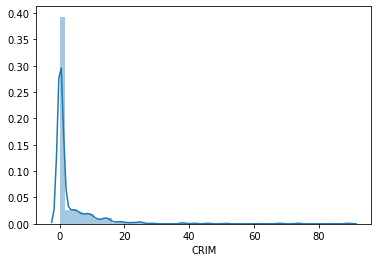

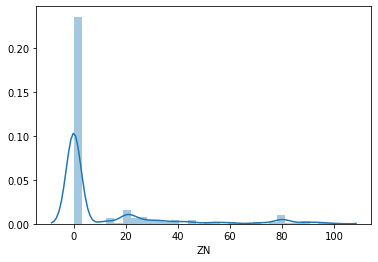

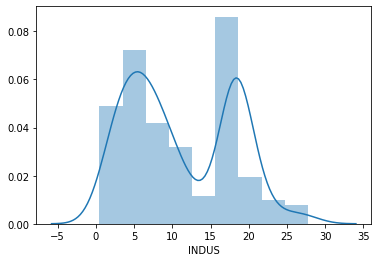

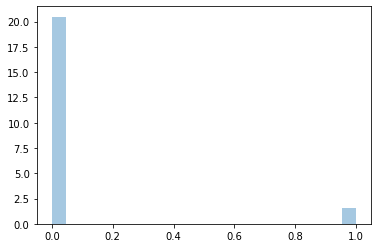

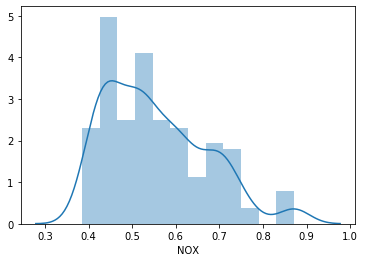

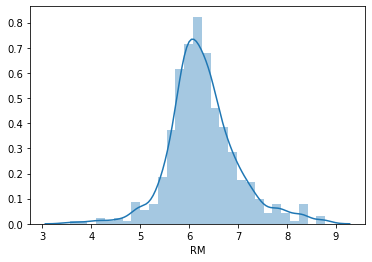

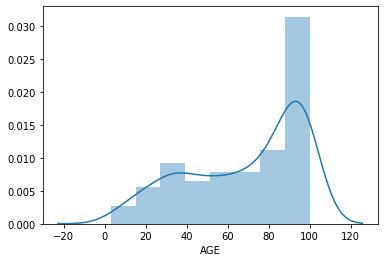

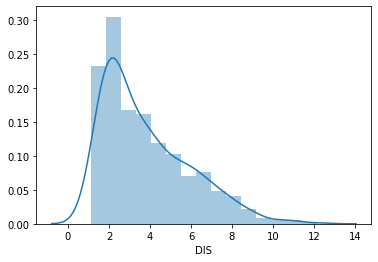

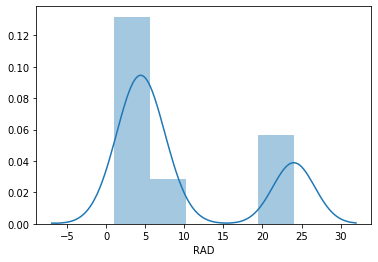

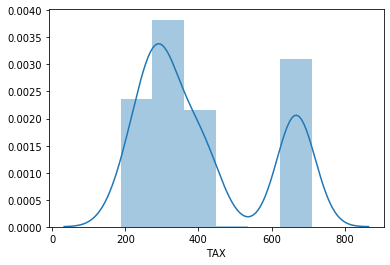

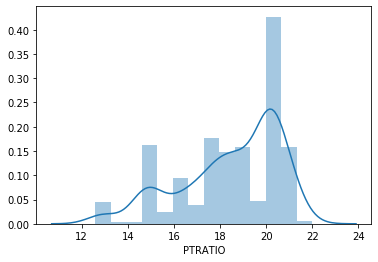

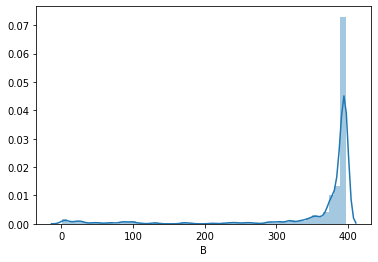

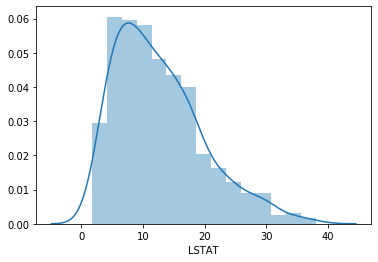

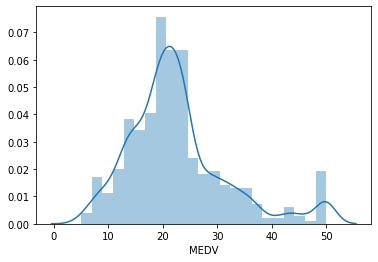

In [3]:
# Пройдем в цикле по всем колонкам и нарисуем частотные графики для каждого
for x in data.columns:
    try:
        plt.subplots()
        sns.distplot(data[x])
    except:
        print(x)

In [22]:
# Распределения для графиков:
# CRIM - Логнормальное
# ZN - Логнормальное
# INDUS - Логнормальное
# CHAS - Бернулли
# NOX - Вейбулла
# RM - Нормальное
# AGE - Бета
# DIS - Вейбулла
# RAD - Биноминальное
# TAX - Логнормальное
# PTRATIO - Вейбулла
# B - Логнормальное
# LSTAT - Гамма
# MEDV - Вейбулла

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

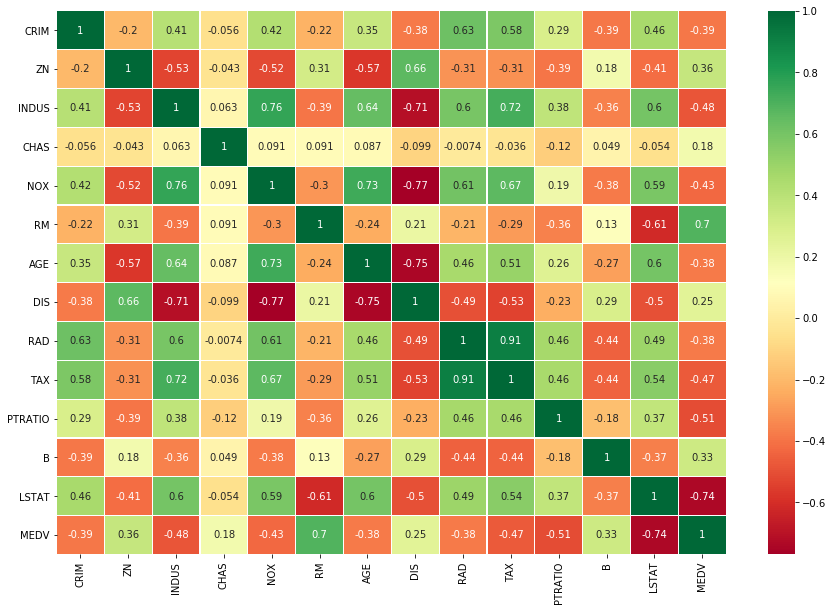

In [4]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [34]:
# Самые коррелирующие атрибуты для MEDV (средняя стоимость частных домов):
# LSTAT = -0,74 - низкий статус населения обратно пропорционален стоимости домов
# PTRATIO = -0,51 - соотношение учеников и учителей по городам обратно пропорционален стоимости домов
# TAX = -0,47 - налог на имущество обратно пропорционален стоимости домов

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



Среднеквадратичная ошибка: 21.105615487849644
Средняя абсолютная ошибка: 3.5943018420680164


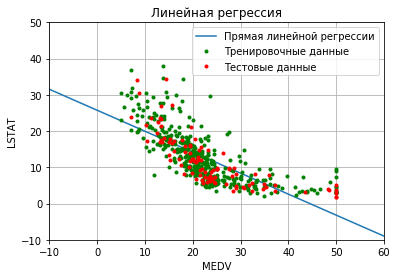

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split( # разделим данные на 80% тренировочных, 20% тестовых
    medv,
    lstat,
    test_size = 0.2
)
model.fit(X_train, y_train) # обучим модель
predicted_y = model.predict(X_test) # предсказания модели на тестируемых данных

print('Среднеквадратичная ошибка:',mean_squared_error(predicted_y, y_test)) # Посчитаем ошибки модели
print('Средняя абсолютная ошибка:',mean_absolute_error(predicted_y, y_test))

plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия')
x = np.linspace(-10, 60, 100) # Создадим 100 точек для предсказаний
y = model.coef_ * x + model.intercept_ # y = kx + b
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, '.', color='g')
plt.plot(X_test, y_test, '.', color='r')
plt.xlim(-10,60)
plt.ylim(-10,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.grid()
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [6]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [36]:
# Матрица ковариаций
data.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [7]:
data.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Сколько стран в выборке? Написать ответ. 

In [8]:
data['Country (region)'].count()

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

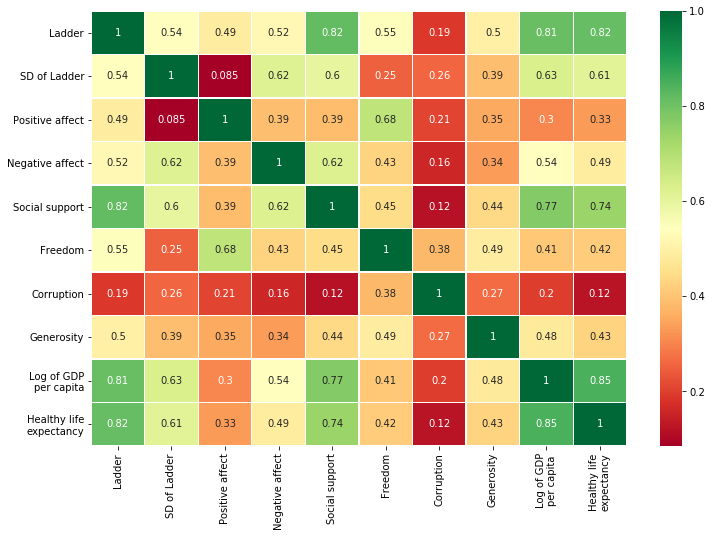

In [9]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Выпавшие варианты: [1, 5, 4, 3, 3, 4, 2, 2, 1, 1]


(array([3., 0., 2., 0., 0., 2., 0., 2., 0., 1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

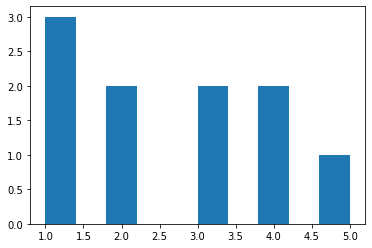

In [10]:
x=[]
i=0

while i < 10:
    x.append(np.random.randint(1, 6))
    i = i + 1

print('Выпавшие варианты:',x)
plt.hist(x)

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

(array([  8.,  55.,  95., 205., 232., 225., 129.,  31.,  19.,   1.]),
 array([259., 268., 277., 286., 295., 304., 313., 322., 331., 340., 349.]),
 <a list of 10 Patch objects>)

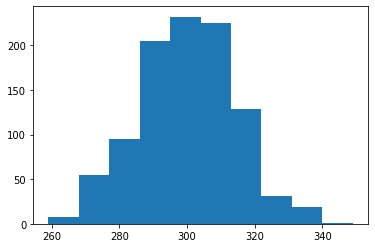

In [30]:
x=[]
i=0

while i < 1000:
    j=0
    sums=0
    while j < 100:
        sums+=np.random.randint(1, 6)
        j = j + 1
    x.append(sums)
    i = i + 1

plt.hist(x)

In [28]:
# График изменился потому, что по центальной предельной теореме - сумма достаточно большого количества слабо зависимых
# случайных величин, имеющих примерно одинаковые масштабы, имеет распределение, близкое к нормальному.
# Как можно увидеть на графике - это похоже на нормальное распределение
# Теорему можно применить потому, что в нашем случае есть большое кол-во случайных величин одинакового масштаба